In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-07-25 00:30:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
正在解析主机 storage.googleapis.com (storage.googleapis.com)... 34.64.4.112, 34.64.4.80, 34.64.4.16
正在连接 storage.googleapis.com (storage.googleapis.com)|34.64.4.112|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：68970 (67K) [text/plain]
正在保存至: “/tmp/irish-lyrics-eof.txt”

/tmp/irish-lyrics-e 100%[===================>]  67.35K  25.0KB/s  用时 2.7s      

2020-07-25 00:30:29 (25.0 KB/s) - 已保存 “/tmp/irish-lyrics-eof.txt” [68970/68970])



In [3]:
tokenizer=Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus=data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [4]:
input_sequences=[]

for line in corpus:
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence=token_list[:i+1]
        input_sequences.append(n_gram_sequence)

        
# Pad sequences
max_sequence_len=max([len(x) for x in input_sequences])
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))

# Create predictors adnd label
xs,labels=input_sequences[:,:-1],input_sequences[:,-1]

ys=tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [6]:
model=tf.keras.models.Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation='softmax'))
adam=Adam(lr=0.01)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['acc'])

history=model.fit(xs,ys,
                  epochs=20,
                  verbose=1)

Train on 12038 samples
Epoch 1/20
12038/12038 [==============================] - 9s 783us/sample - loss: 6.6471 - acc: 0.0746
Epoch 2/20
12038/12038 [==============================] - 9s 771us/sample - loss: 5.7768 - acc: 0.1146
Epoch 3/20
12038/12038 [==============================] - 9s 738us/sample - loss: 4.9401 - acc: 0.1651
Epoch 4/20
12038/12038 [==============================] - 8s 698us/sample - loss: 4.0714 - acc: 0.2304
Epoch 5/20
12038/12038 [==============================] - 9s 707us/sample - loss: 3.2537 - acc: 0.3215
Epoch 6/20
12038/12038 [==============================] - 10s 813us/sample - loss: 2.5762 - acc: 0.4253
Epoch 7/20
12038/12038 [==============================] - 9s 768us/sample - loss: 2.0479 - acc: 0.5284
Epoch 8/20
12038/12038 [==============================] - 13s 1ms/sample - loss: 1.6933 - acc: 0.6003
Epoch 9/20
12038/12038 [==============================] - 16s 1ms/sample - loss: 1.4372 - acc: 0.6547
Epoch 10/20
12038/12038 [==========================

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

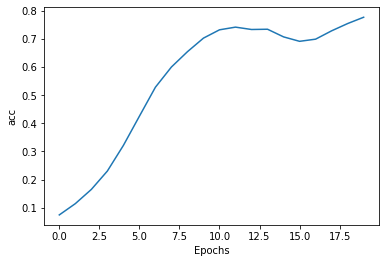

In [8]:
plot_graphs(history,'acc')

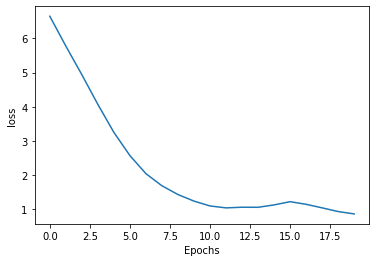

In [9]:
plot_graphs(history,'loss')

In [10]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this that gives out oer the moor boundless ocean with the nut brown irishmen of find said the rose behind her they my high isle of more are on my breast for more of green woods still gone by and the wind new cares love oer the fire my blind grandmother sitting in my days of yore roaming away my high tower died love fray will cease from here and stainless then i will climb a high high high tree designed can be thee one could save her hand at me and this one more gone by and side molly malone
